<div style="text-align: center;">
  <img src="img2.webp" alt="Credit Card Fraud Detection" style="width:300px; height:auto;">
</div>


# Credit Card Fraud Detection

Done by: Sri Sai Charith Grandhi (UID: 121326263)

This tutorial will serve as a guide for a data science life by tackling a real world problem, Credit Card Fraud transaction detection. We will try and cover all the aspects from data collection to model building and insight drawing using the techniques learned from the DATA601 class.

The data science life cycle typically consists of following steps.

1. Data Collection and Cleaning
2. Data Processing / Feature Engineering
3. Exploratory Data Analysis and Data Visualization
4. Model/Hypothesis Analysis and testing
5. Interpreting results
6. Conclusion

The main obejective of this tutorial is to build a predictive model which will be useful for detecting fraudulent credit card transactions. We will try and achieve the best performing model, but the main idea is to walkthrough the process which will give insights into the fraudulent behaviour through data analysis and machine learning.

Fraud detection is one of the main use cases in todays financial sector. Availability of technology to everyone, has significantly contributed to rise of these fraudulent transactions. These fraud transactions are costing businessess and individuals, billions of dollars anually. In fact in 2018, payment card fraud resulted in losses over $24.2 billion. These losses are projected to reach $40 billion by 2027 if proper care is not taken. The magnitude of this problem calls for intelligent models which can detect a fraud transaction and take action before its too late.

Credit card fraud detection will involve identifying pattern or anomolies in transaction data, to differentiate between legit and fraud transactions. The pattern of a fraud transaction may depend on several factors, such as below

1. Transaction amount: Fraud amounts may be signifcantly variable from typical spending habits.
2. Geographical location: Most often the fraud transactions happen in a completely different geographical location of consumer and institution (in some cases, might be a completely different country)
3. Time of transaction: There might be a pattern of the fraud transaction happening at a particular time frame of a day, which we can try and capture.
4. Number of transactions: Number of a transactions might be very high if a fraud is happening on a particular user credit card.



## DATA COLLECTION AND CLEANING

First we will start by collecting raw data. The raw data comes from various sources, but mainly from surveys. For the purpose of this tutorial, I am going to use anonymized credit card purchase data which are categorised as fraud and not fraud transactions.

This unclean dataset is obtained from a popular dataset on one of the most useful websites for Data Science enthusiasts, kaggle.

The data set contains 23 columns in total as will be seen in the following code.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")


In [55]:
#read the downloaded dataset using pandas
data = pd.read_csv('fraud_test.csv')
df = data.copy()

In [56]:
#Now we will start cleaning the data so that it will be ready for some Exploratory Data Analysis and Model Building

In [57]:
#lets have a look at the raw dataset
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",NaN,NaN,Ashley,Lopez,NaN,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [58]:
#Dropping the unnamed column

data.drop(data.columns[0],axis=1,inplace = True)

In [59]:
#Lets get info of the data columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566833 entries, 0 to 566832
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  566783 non-null  object 
 1   cc_num                 566833 non-null  float64
 2   merchant               566833 non-null  object 
 3   category               510150 non-null  object 
 4   amt                    500148 non-null  float64
 5   first                  566833 non-null  object 
 6   last                   566833 non-null  object 
 7   gender                 510150 non-null  object 
 8   street                 566833 non-null  object 
 9   city                   566833 non-null  object 
 10  state                  566833 non-null  object 
 11  zip                    566833 non-null  int64  
 12  lat                    566833 non-null  float64
 13  long                   566833 non-null  float64
 14  city_pop               510150 non-nu

In [60]:
# Here we can see that there is missing data in our dataset, that we need to deal with
data.isnull().sum()

,0
trans_date_trans_time,50
cc_num,0
merchant,0
category,56683
amt,66685
first,0
last,0
gender,56683
street,0
city,0


In [61]:
#The data is missing in Category, Amount, Gender, and, City Population columns.
#Below We are plotting a histogram to see the distribution of amount in our data

Text(0, 0.5, 'Frequency')

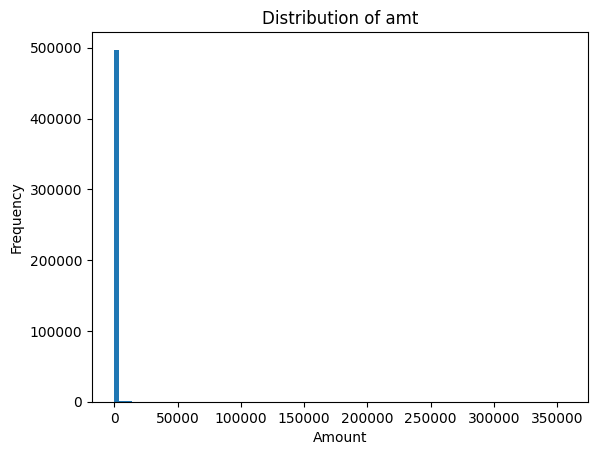

In [62]:
plt.hist(data['amt'].dropna(),bins=100)
plt.title('Distribution of amt')
plt.xlabel('Amount')
plt.ylabel('Frequency')

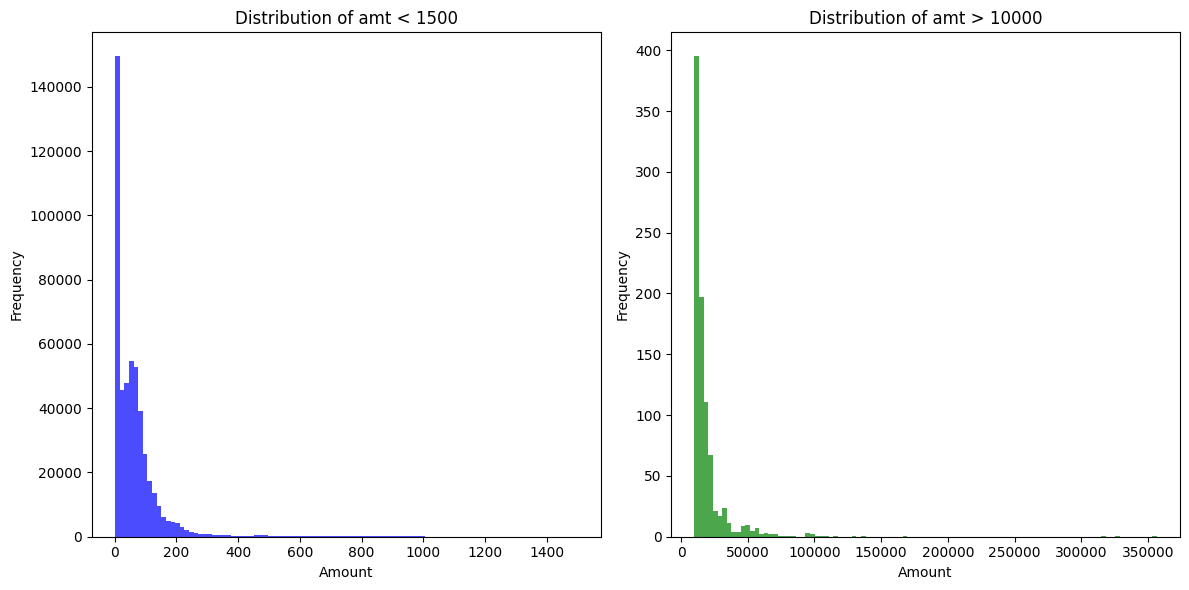

In [63]:
import matplotlib.pyplot as plt

# Create two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for amt < 1500
ax[0].hist(data[data['amt'] < 1500]['amt'].dropna(), bins=100, color='blue', alpha=0.7)
ax[0].set_title('Distribution of amt < 1500')
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Frequency')

# Plot for amt > 10000
ax[1].hist(data[data['amt'] > 10000]['amt'].dropna(), bins=100, color='green', alpha=0.7)
ax[1].set_title('Distribution of amt > 10000')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


We can see that the distribution of amount is heavily skewed to right. That means that there are transactions very high in amount but in small numbers as shown above. This leads us to impute our missing amt data with median rather than mean, as median is not affected by the skewness of our data, while mean is.

Text(0, 0.5, 'Frequency')

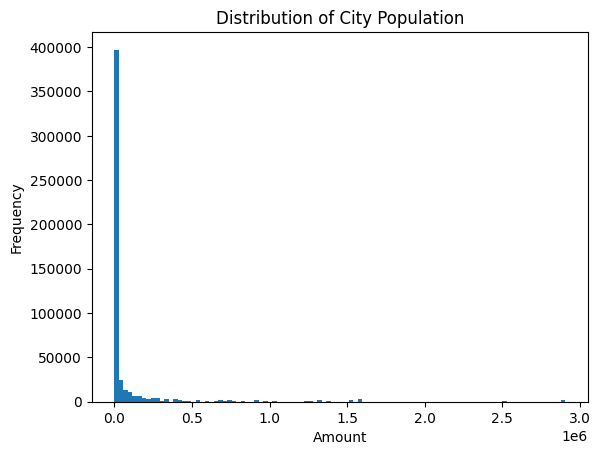

In [64]:
plt.hist(data['city_pop'].dropna(),bins=100)
plt.title('Distribution of City Population')
plt.xlabel('Amount')
plt.ylabel('Frequency')

City Population is also skewed to the right, We will use median for imputations in city population as well

In [65]:
#imputing missing data for numerical columns

data['amt'].fillna(data['amt'].median(),inplace=True) #using median as median is a better estimate for imputing because of the skewness of the data.
data['city_pop'].fillna(data['city_pop'].median(),inplace=True)

Now that we have dealt with the missing values in numerical columns, we will now shift our focus to categorical missing data.

For categorical data, we will just impute the mode of the data (data point with high frequency in our dataset)

In [66]:
#imputing missing data in categorical columns
data['category'].fillna(data['category'].mode()[0], inplace=True)
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

After dealing with missing data, we will clean out data to remove the duplicates.

In [67]:
#checking for duplicate rows in the dataframe
num_duplicates = data.duplicated().sum()
num_duplicates

5706

In [68]:
#dropping the duplicates from the data
data.drop_duplicates(inplace=True)
num_duplicates_after = data.duplicated().sum()
num_duplicates_after

0

Now we are done with dealing duplicate data in our dataset.

We can now see and filter the data to the columns that we believe will contribute to detection of fraud transaction.

We are dropping the names columns, street, city and state, since we are keeping zipcode in our data, and we are also removing trans_num since it will be unique to each transaction

In [69]:
data.drop(columns=['first','last','street','city','state','trans_num'],inplace=True)

Now lets focus on feature engineering some of the features from the existing columns from our data.

First we will break down the transaction date and time into year,day,month, and weekday

# Feature Engineering

In [70]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')
data.dropna(subset=['trans_date_trans_time'], inplace=True)

In [71]:
#converting date and time column to date, month, , hour, minutes

data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_weekday'] = data['trans_date_trans_time'].dt.weekday


We can also obtain the age of the customer from the dob and the transaction data

In [72]:
from datetime import datetime

data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['customer_age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365


Since we have the coordintes of the customer location and the coordiantes of the merch location where transaction is taking place, we will use popular Haversine formula to calculate the distance between to geographical locations. Most often the fraudulent transactions happen very far from the customer location, which can give some pattern to our fraudulent transactions.

In [73]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    radius = 6371  # Earth's radius in kilometers
    return radius * c

data['distance'] = data.apply(lambda row: haversine(
    row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


Now we will plot the fraud data with respect to the distance and try to see if there is any pattern

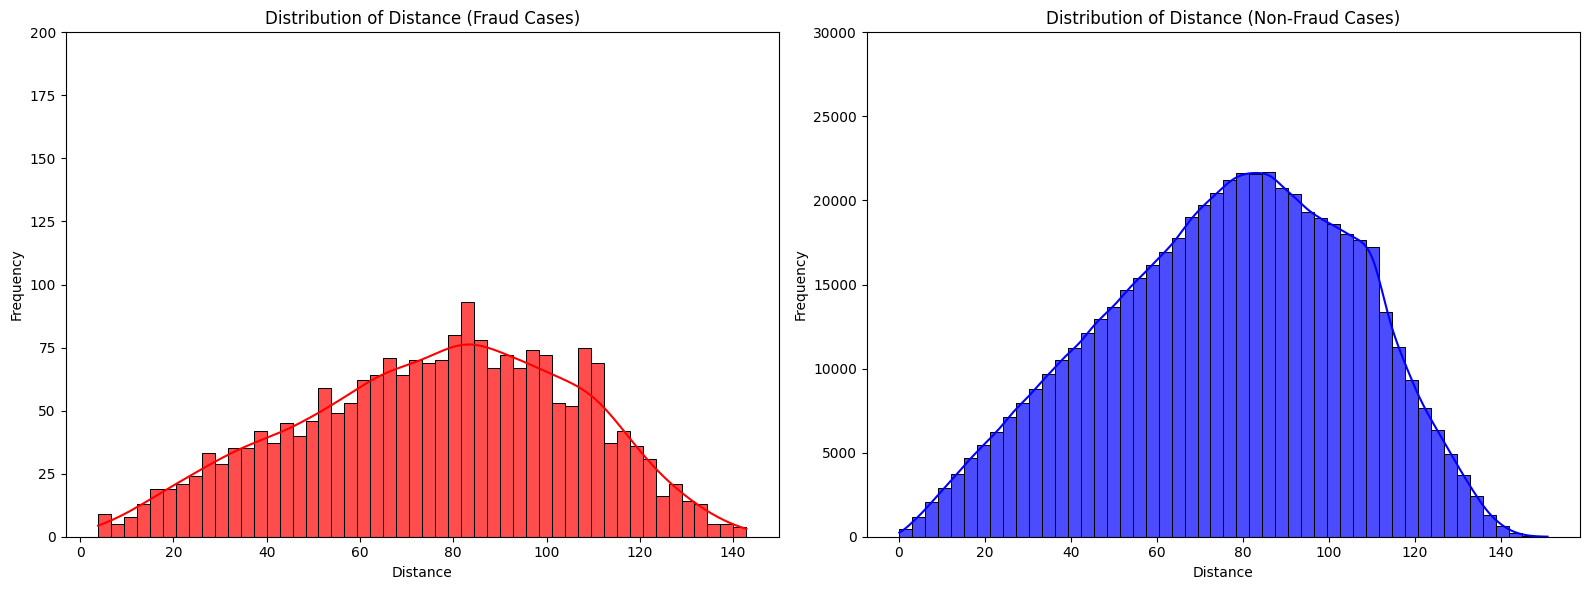

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is a pandas DataFrame with 'distance' and 'is_fraud' columns

# Filter the data for fraud and non-fraud cases
fraud_data = data[data['is_fraud'] == 1]
non_fraud_data = data[data['is_fraud'] == 0]

# Create two subplots for fraud and non-fraud cases
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for fraud cases
sns.histplot(fraud_data['distance'], bins=50, kde=True, color='red', ax=ax[0], alpha=0.7)
ax[0].set_title('Distribution of Distance (Fraud Cases)')
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Frequency')
ax[0].set_ylim(0, 200)  # Set y-axis limit for fraud data

# Plot for non-fraud cases
sns.histplot(non_fraud_data['distance'], bins=50, kde=True, color='blue', ax=ax[1], alpha=0.7)
ax[1].set_title('Distribution of Distance (Non-Fraud Cases)')
ax[1].set_xlabel('Distance')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0, 30000)  # Set y-axis limit for non-fraud data

# Adjust layout for better display
plt.tight_layout()
plt.show()


We can see that the fraud cases and non fraud cases are distributed in a similar shape. This gives us intuition that distance is not a good feature for our model building. We will further get proof fro this from our correlation matrix and then see if we will remove the distance column completely

Below we are feature engineering another feature into our data set. Here we are going to introduce a boolean feature  - is_high_amount, based on the amount value of the transaction.

In [75]:
data['is_high_amt'] = (data['amt'] > data['amt'].quantile(0.95)).astype(int)


Below, we will proceed with encoding the categorical features in our dataset. Before that, we need to install the required encoding libraries

In [76]:
!pip install category_encoders

In [77]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# Categorical columns to encode
categorical_columns = ['category', 'gender']
encoder = OneHotEncoder(drop='first',sparse_output=False)  # Drop first to avoid multicollinearity
encoded_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns), index=data.index)

#Now Concatenate the encoded features back to the original dataset
data = pd.concat([data, encoded_df], axis=1)

# Drop original categorical columns
data.drop(columns=categorical_columns, inplace=True)

#target encoding the job and zip columns since frauds can be repeated from same place by a same person
encoder = ce.TargetEncoder(cols=['job', 'zip'])
data = encoder.fit_transform(data, data['is_fraud'])



In above encoding, I have encoded  the features, category and gender using one hot encoding technique. This technique will add category coulmns to our data frame and the corresponding category for a data entry will have 1, while rest of the columns will have 0.

I have also transformed or encoded the columns job and zip using target encoding. This is a technique where all the instances of a particular job or zip, will be encoded with the mean of the target variable values.


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['amt_standardized'] = scaler.fit_transform(data[['amt']])


Now I have dealt with the probelm of the amount value being very variable and big in number. We use a method called standardization, to convert our data to values with a mean of 0 and standard deviation of 1.

In [79]:
data['is_fraud'] = data.pop('is_fraud') # here I am just moving the target variable column to the end of the dataframe

In [80]:
columns_to_drop = ['category', 'gender', 'merchant', 'trans_date_trans_time', 'dob', 'cc_num','amt','lat','long','merch_lat','merch_long']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)


I have removed all the non useful columns in our dataset and reduced the number of columns to only the columns that we will use for our model building. Below I have listed all the columns that we may use for next processes

In [81]:
data.columns

Index(['zip', 'city_pop', 'job', 'unix_time', 'transaction_hour',
       'transaction_day', 'transaction_month', 'transaction_weekday',
       'customer_age', 'distance', 'is_high_amt', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'amt_standardized', 'is_fraud'],
      dtype='object')

Now lets create a heatmap of correlations between pur present columns.

Now below I have tried and visualized some of our features in EDA.

# EDA - Exploratory Data Analysis

In [82]:
# Display basic information
print("Dataset Shape:", data.shape)
print("Missing Values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes.value_counts())

# Summary statistics for numerical columns
print("Numerical Summary:\n", data.describe())


Dataset Shape: (561077, 27)
Missing Values:
 zip                        0
city_pop                   0
job                        0
unix_time                  0
transaction_hour           0
transaction_day            0
transaction_month          0
transaction_weekday        0
customer_age               0
distance                   0
is_high_amt                0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_M                   0
amt_standardized           0
is_fraud                   0
dtype: int64
Data Types:
 float64    19
int64       4
int32       4
Name: count, dtype: int64
Numerical Summary:
                 zip      city_pop            job     unix_

In [83]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

data1 = data.copy()
# Separate features (X) and target (y)
X = data.drop('is_fraud', axis=1)  # Features
y = data['is_fraud']              # Target variable

# Instantiate RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42) # You can change the random_state if needed

# Resample the data
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the class distribution after undersampling
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))

# Create a new DataFrame with the undersampled data
undersampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['is_fraud'])], axis=1)
data = undersampled_data.copy()

Original class distribution: Counter({0: 558910, 1: 2167})
Resampled class distribution: Counter({0: 2167, 1: 2167})


Here we have undersampled the data because the training of model will be affected if there is imbalance in the number of target values. There is huge difference in the number of fraud transactions to number of non fraud transactions. Here I have undersampled the number of non fraud tranasctions to number of fraud transactions in random.

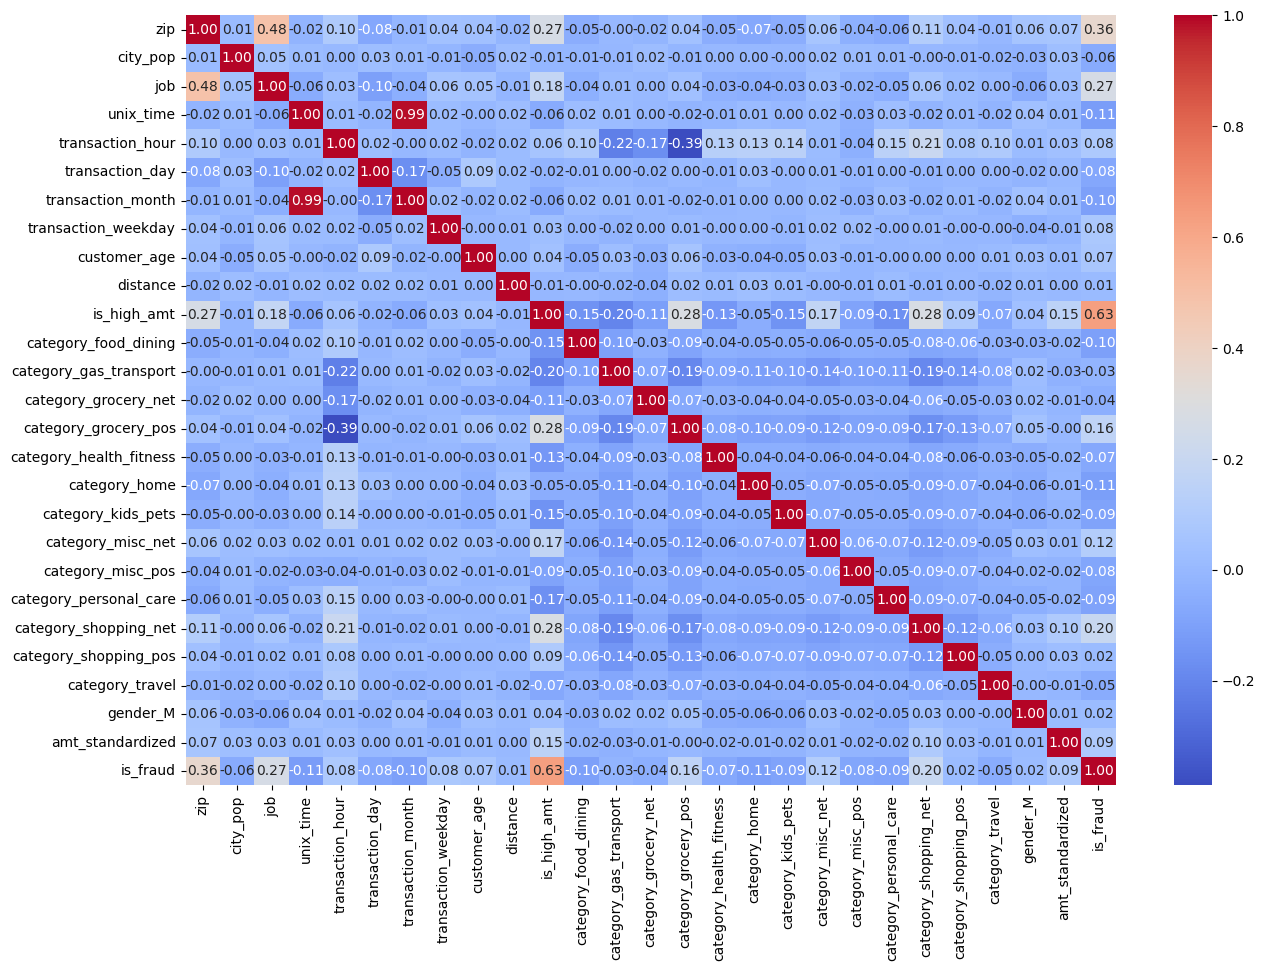

In [84]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

This is the correlation matrix between all the columns in our data set. We can see that there is slight correlation between almost all the collumns.

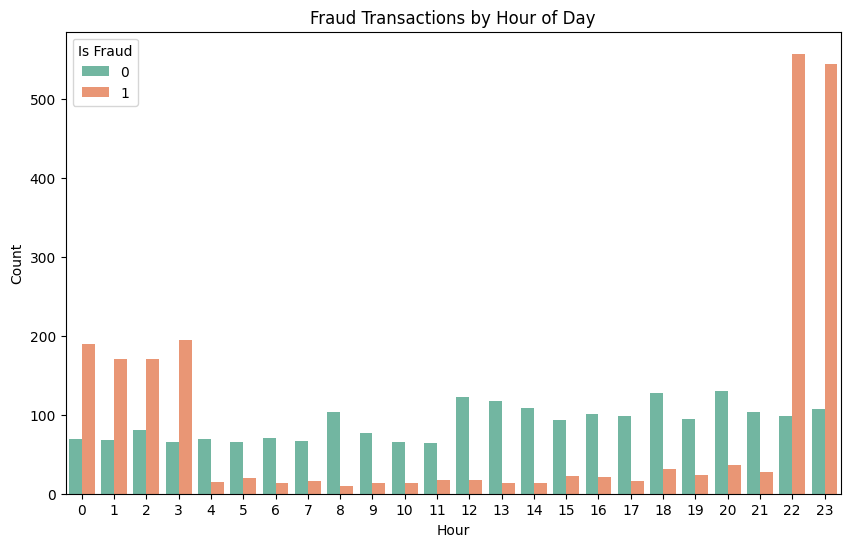

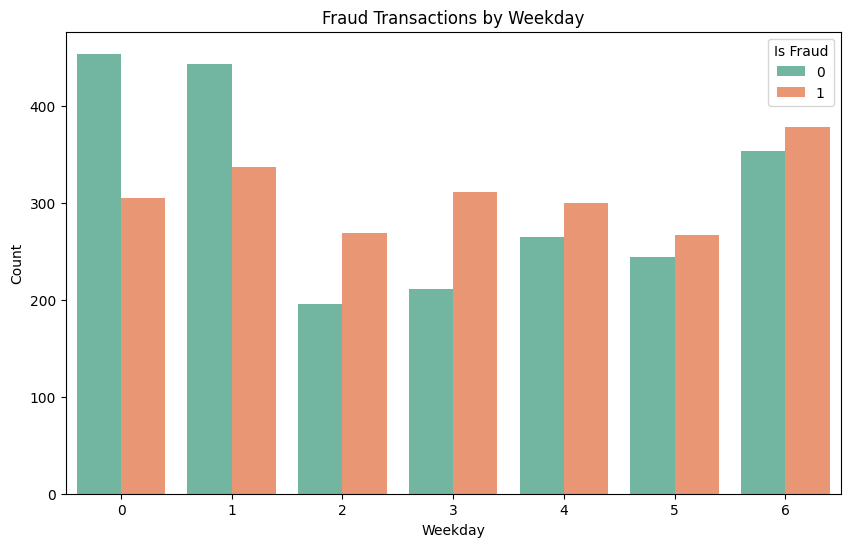

In [85]:
# Fraud occurrences by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='transaction_hour', hue='is_fraud', palette='Set2')
plt.title("Fraud Transactions by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

# Fraud occurrences by weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='transaction_weekday', hue='is_fraud', palette='Set2')
plt.title("Fraud Transactions by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()


The above plots show histogram for non fraud and fraud data segregated by hour and weekday. The fraud transactions are high during hours 0,1,2,3,22,23 (in 24 hr format). Also the fraud transactions are higher during the days Tues, Wed, thursday, friday and saturday.

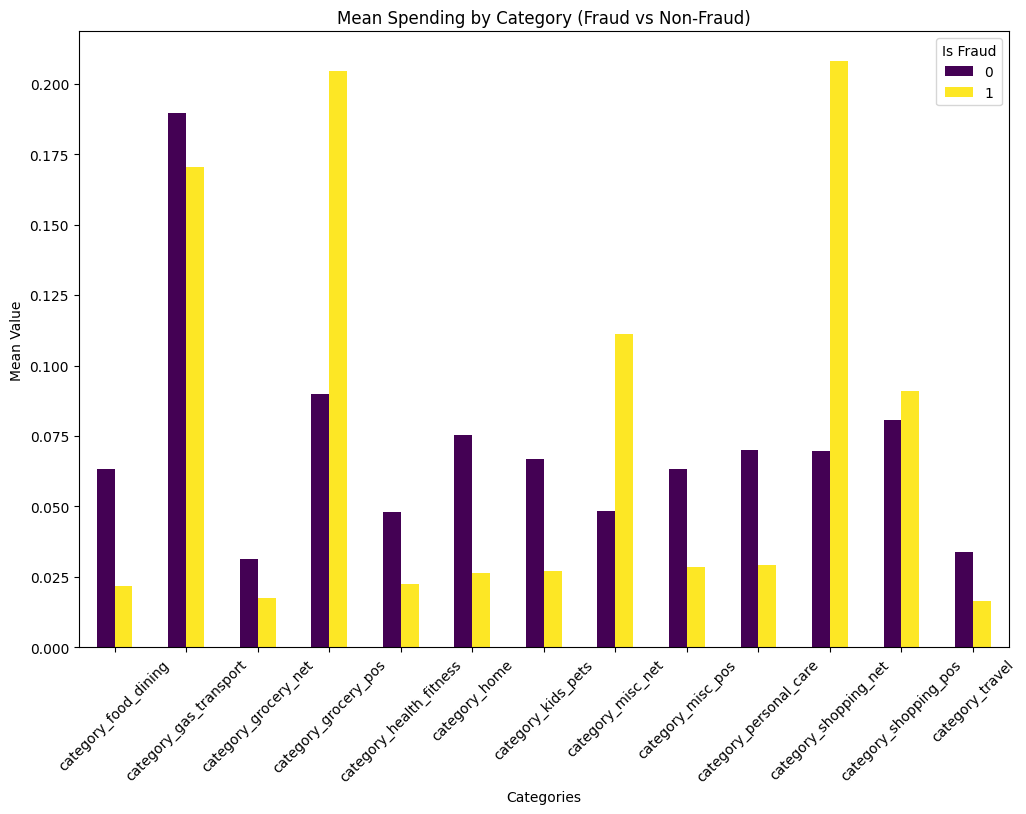

In [86]:
# Fraud rates in spending categories
categories = [col for col in data.columns if 'category_' in col]
fraud_category_means = data.groupby('is_fraud')[categories].mean().T

fraud_category_means.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Mean Spending by Category (Fraud vs Non-Fraud)")
plt.ylabel("Mean Value")
plt.xlabel("Categories")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.show()


From above category histogram plot, we can make out that the fraud transactions are particularly high in particular transaction types like grocery, miss, personal care, shopping, etc.

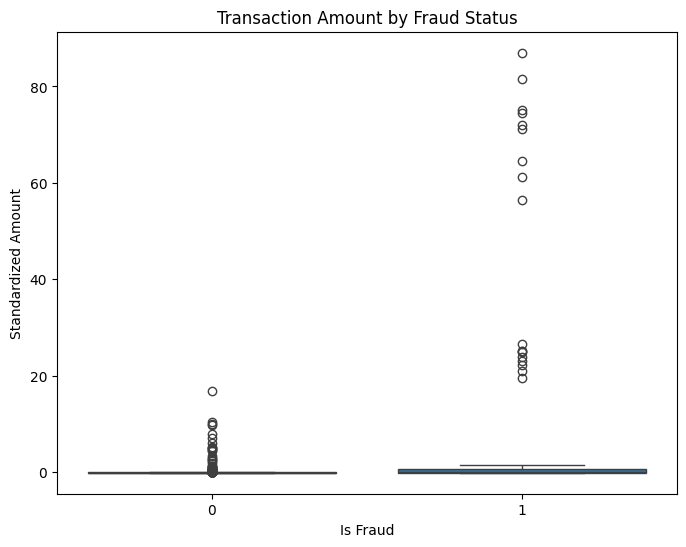

In [87]:
# Comparison of standardized amount for fraud vs non-fraud
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='is_fraud', y='amt_standardized')
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Standardized Amount")
plt.show()


From above box plot, we can see that the transaction amounts for fraud transactions are very high compared to non fraud transactions. This feature by intuition is a very important predictor, but this graph proves that for us

Next, we can look at the number of fraud transactions, available in our dataset after undersampling our dataset

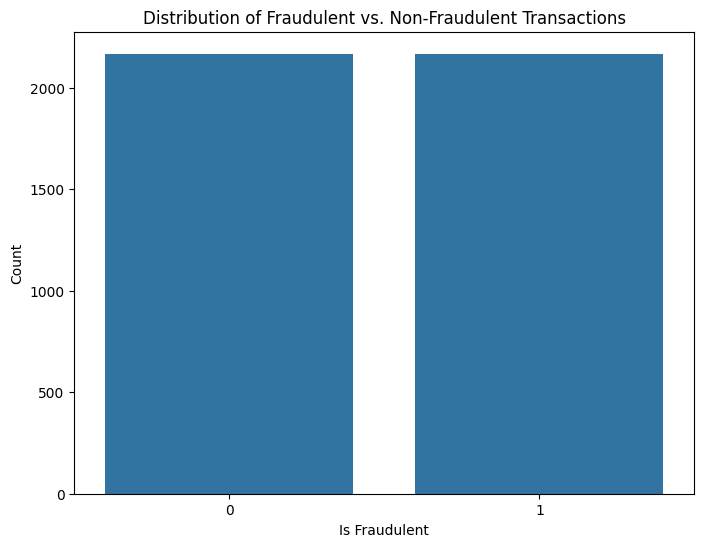

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'is_fraud' is the column indicating fraud (1) or not (0)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

Since we undersampled the data, we have same number of fraud and non fraud transactions that we will use for our model training. This will help better training for our model.

Next, lets see when these fraud transactions are taking place with respect to time of a day. First, we have to filter out only transactions that are fraud, then we can plot a line graph between the number of fraud transactions and hour of the day.

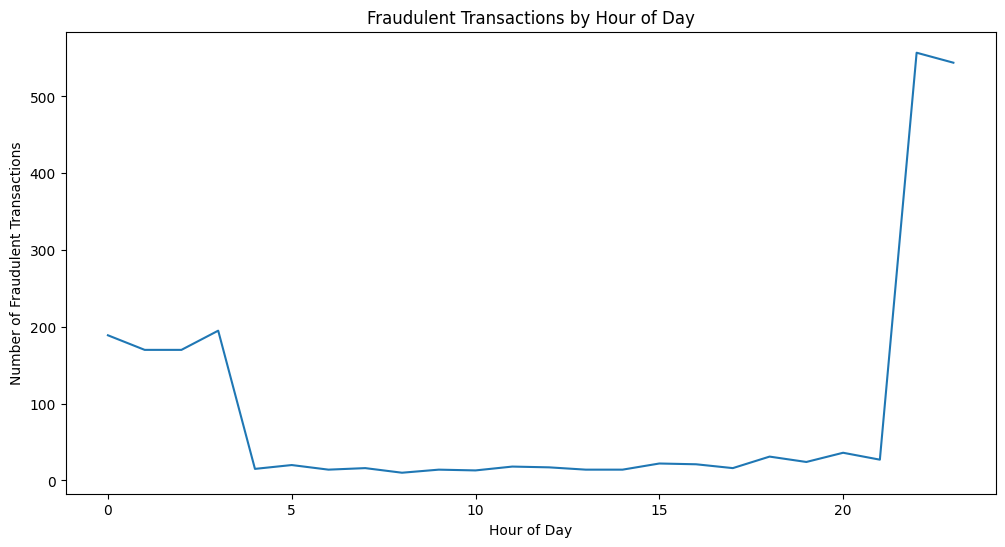

In [89]:
# Filter data for fraudulent transactions only
fraud_data = data[data['is_fraud'] == 1]

transactions_by_hour = fraud_data.groupby('transaction_hour')['is_fraud'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_hour', y='count', data=transactions_by_hour)
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

We can clearly see that the fraud transactions do not take place or negligible amount take place between 5 Am and 8 Pm. There is high amount of fraud transaction between 8 PM and 5 AM

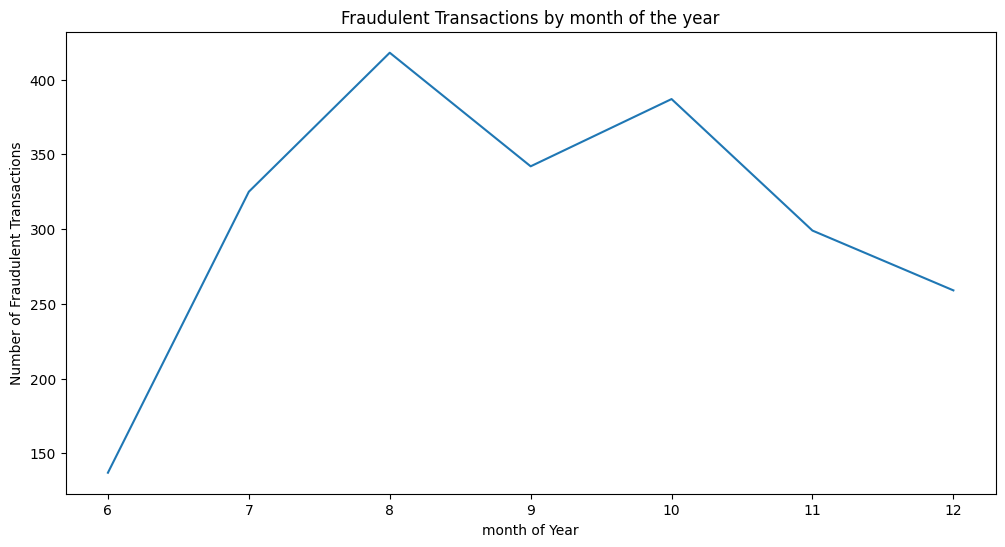

In [90]:
transactions_by_hour = fraud_data.groupby('transaction_month')['is_fraud'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_month', y='count', data=transactions_by_hour)
plt.title('Fraudulent Transactions by month of the year')
plt.xlabel('month of Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

Here, We have plotted the graph for the fraud transactions and the month they are takng place. Surprisingly, the fraud transactions are only from 6 to 12 months i.e. july to december. Although there seems to be a pattern, we can say by intuition that this is purely coincidental. Fraud transactions can and will take place in any month of the year. But it is intersting to see a peak at the month of August and then decline.

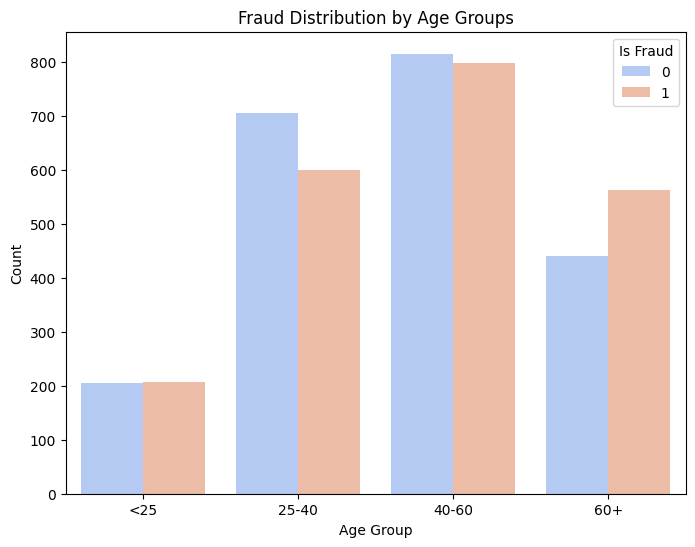

In [91]:
# Creating age groups
data['age_group'] = pd.cut(data['customer_age'], bins=[0, 25, 40, 60, 100], labels=['<25', '25-40', '40-60', '60+'])

# Fraud count by age group
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='age_group', hue='is_fraud', palette='coolwarm')
plt.title("Fraud Distribution by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()


Trying to see if fraud transactions were affected by the age of the customer, We can see a pattern where the fraud transactions are increasing with age, except for 60+ (This also could be because there is less chance of 60+ people using credit cards).However, in the age bracket of 60+, there are more fraud transactions than actual transactions

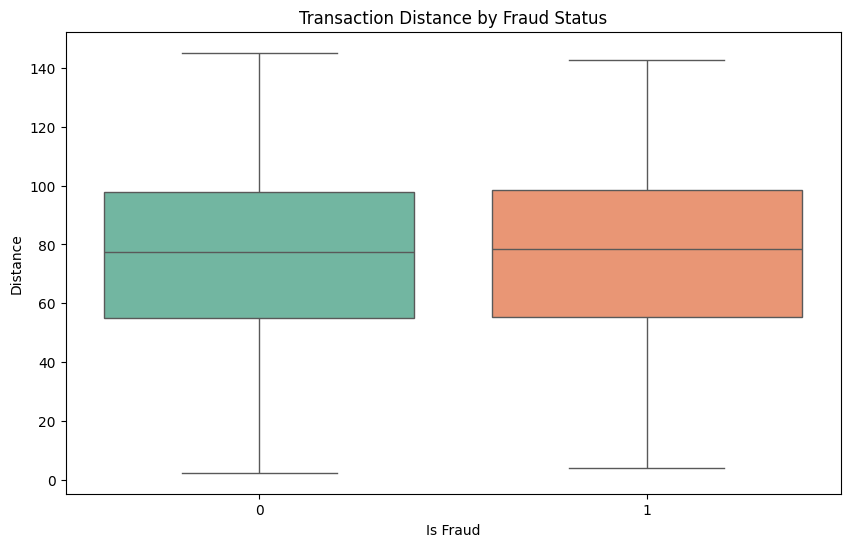

In [92]:
# Distance distribution for fraud vs non-fraud
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='is_fraud', y='distance', palette='Set2')
plt.title("Transaction Distance by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Distance")
plt.show()


The box plot for fraud and non fraud data shows very similar plots, this means that distacne is not a great predictor for a fraud detection. The only difference in the two box plots is slight variations in mean and outliers.

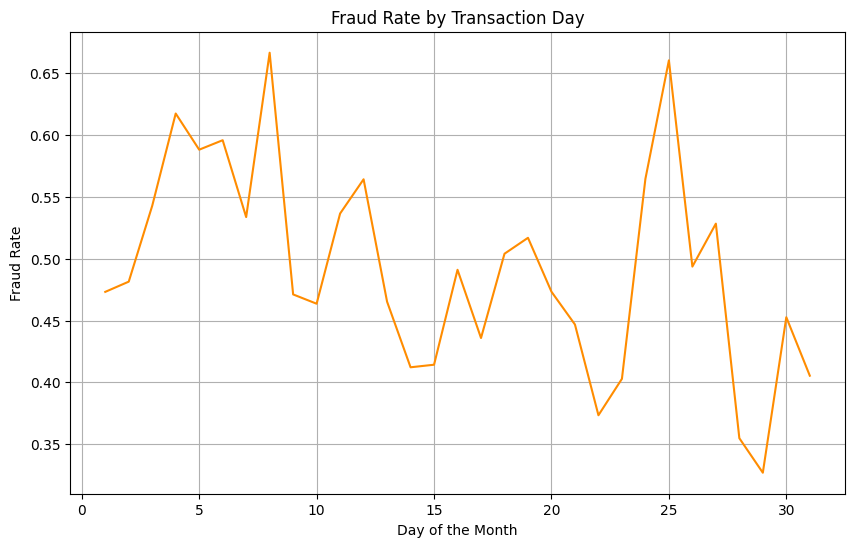

In [93]:
# Fraud rate by transaction day
fraud_rate_by_day = data.groupby('transaction_day')['is_fraud'].mean()

plt.figure(figsize=(10, 6))
fraud_rate_by_day.plot(kind='line', color='darkorange')
plt.title("Fraud Rate by Transaction Day")
plt.xlabel("Day of the Month")
plt.ylabel("Fraud Rate")
plt.grid(True)
plt.show()


By above line graph, we can see that the frauds are at peak during the start of the month and at the end of the month. This could mean that the date of the month could prove to be a good predictor for our classification

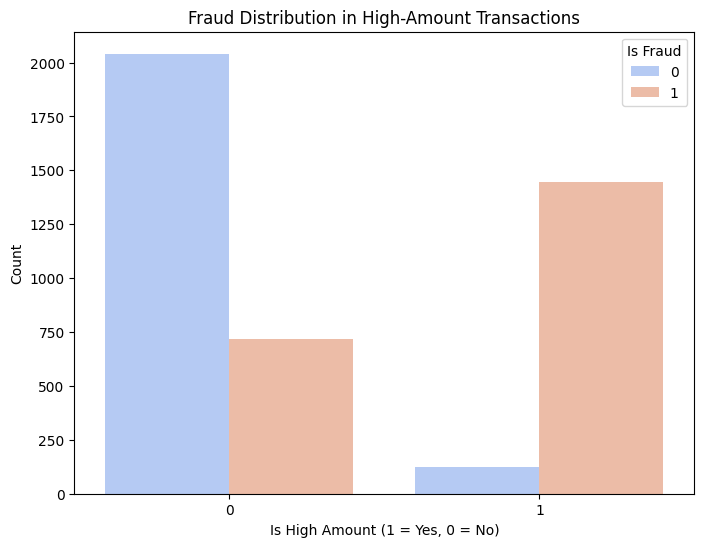

In [94]:
# Fraud count for high-amount transactions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='is_high_amt', hue='is_fraud', palette='coolwarm')
plt.title("Fraud Distribution in High-Amount Transactions")
plt.xlabel("Is High Amount (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()


we can see that the number of fraud transactions clearly high where the amount is high. This indicates that the is_high feature is a valuable feature for our classification models.

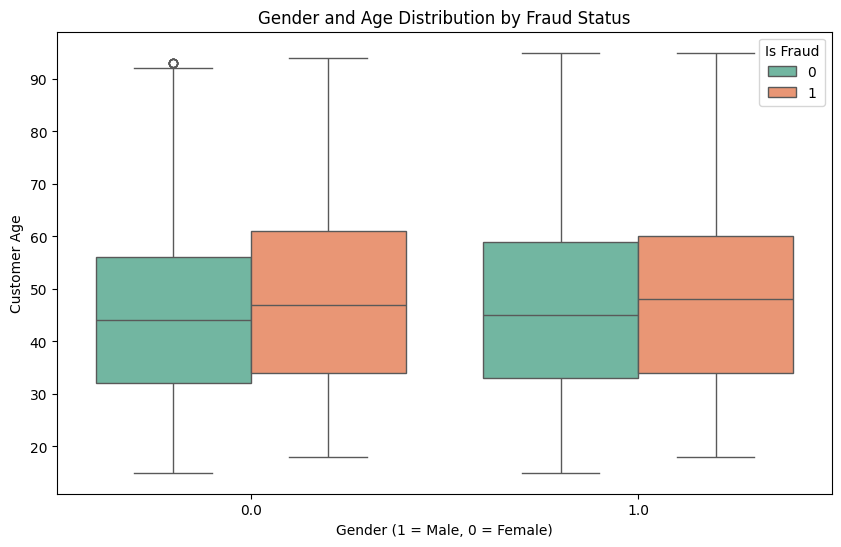

In [95]:
# Gender and age distribution for fraud vs non-fraud
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='gender_M', y='customer_age', hue='is_fraud', palette='Set2')
plt.title("Gender and Age Distribution by Fraud Status")
plt.xlabel("Gender (1 = Male, 0 = Female)")
plt.ylabel("Customer Age")
plt.legend(title="Is Fraud")
plt.show()


# Model Building and Hypothesis testing

We will first start by splitting our undersampled dataset into training and testing datasets. by using train_test_split from sklearn.model_selection

In [96]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the undersampled data
X_resampled = undersampled_data.drop('is_fraud', axis=1)
y_resampled = undersampled_data['is_fraud']

# Split the data into training and testing sets using train_test_split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Printing the final shapes of the resulting train and test datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3467, 26)
X_test shape: (867, 26)
y_train shape: (3467,)
y_test shape: (867,)


## Random Forest

We will start by building a Random Forest classifier for our training dataset. Using Random Forest, we can also obtain feature importance, which will give further insights into determining a transaction to be fraud or not

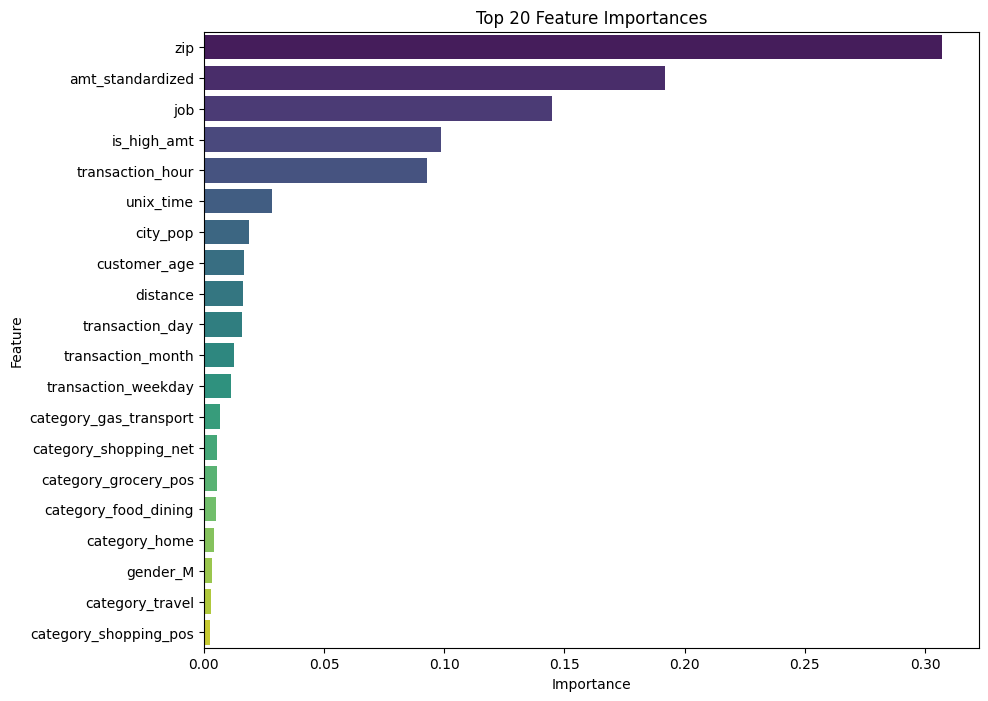

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Random Forest Classifier
RFmodel = RandomForestClassifier(random_state=42, n_estimators=100)
RFmodel.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': RFmodel.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20), palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

One of the benefits of using Random Forests is that we can get feature importance for all the features used in the model as shown above, This will be very helpful in analysing which features are contributing most to the determination of a fraud transaction.

Model Accuracy: 0.9689
Precision: 0.9623
Recall: 0.9737
F1 Score: 0.9680


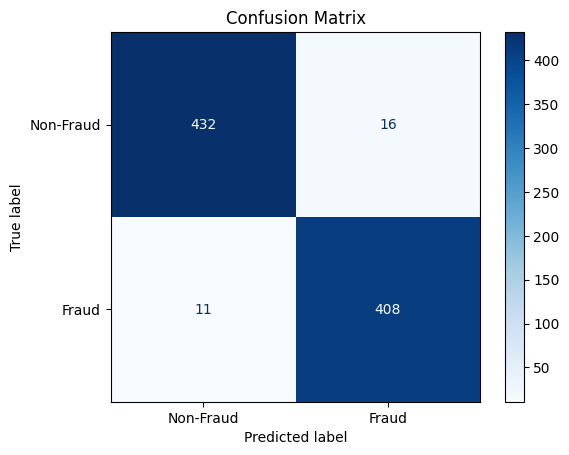

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = RFmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

The accuracy and other metrics for our Random Fores implementation are printed above. We can see that the model is performing very well in terms of determining the fraud transactions. We can hope to further improve our model accuracy by implementing Randomized Search CV (It is a method where we will ask computer to train Random forest on combinations of hyper parameters, and selecting the parameters that give us best performance). We will try and implement this GridSearchCV after implementing and analysing performaces of other Machine Learning models.

## Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
LRmodel = LogisticRegression(random_state=42)  # You can adjust hyperparameters here

# Train the LRmodel on the training data
LRmodel.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LRmodel.predict(X_test)



Model Accuracy: 0.4994
Precision: 0.4902
Recall: 0.8998
F1 Score: 0.6347


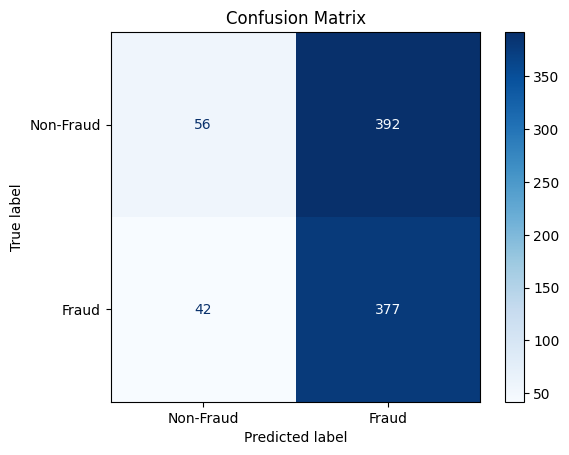

In [100]:
y_pred = LRmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Here, we have implemented a Logistic Regression model. We can see that the performance of LR is not that great with an accuracy of 49% and F1 score of 0.63

We can infer that Logistic Regression is not that great for our application as it is not able to capture the patterns to classify the fraud transactions correctly.

We will now implement Decision Tree


## Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
DTmodel = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model on the training data
DTmodel.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = DTmodel.predict(X_test)


Model Accuracy: 0.9562
Precision: 0.9547
Recall: 0.9547
F1 Score: 0.9547


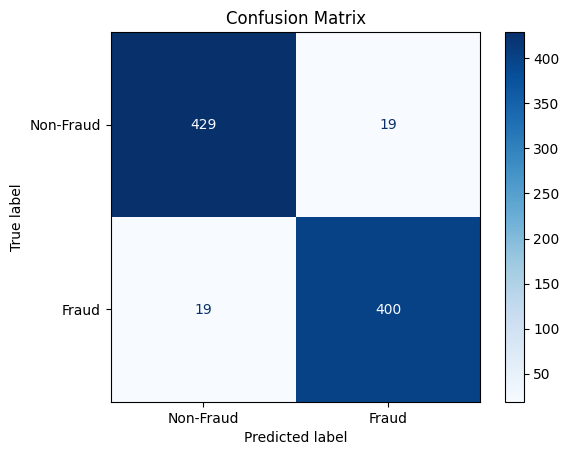

In [102]:
#Evaluating the decision tree model
y_pred = DTmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the metrics
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


The above implementation is Decision Tree. The performance of Decision tree is also very satisfactory, slightly less than Random Forest.

We can also try and improve the Decision tree performance by using Grid Search CV which is similar to Random Search CV.

Decision Tree - ROC AUC Score: 0.9561
Random Forest - ROC AUC Score: 0.9953
Logistic Regression - ROC AUC Score: 0.5013


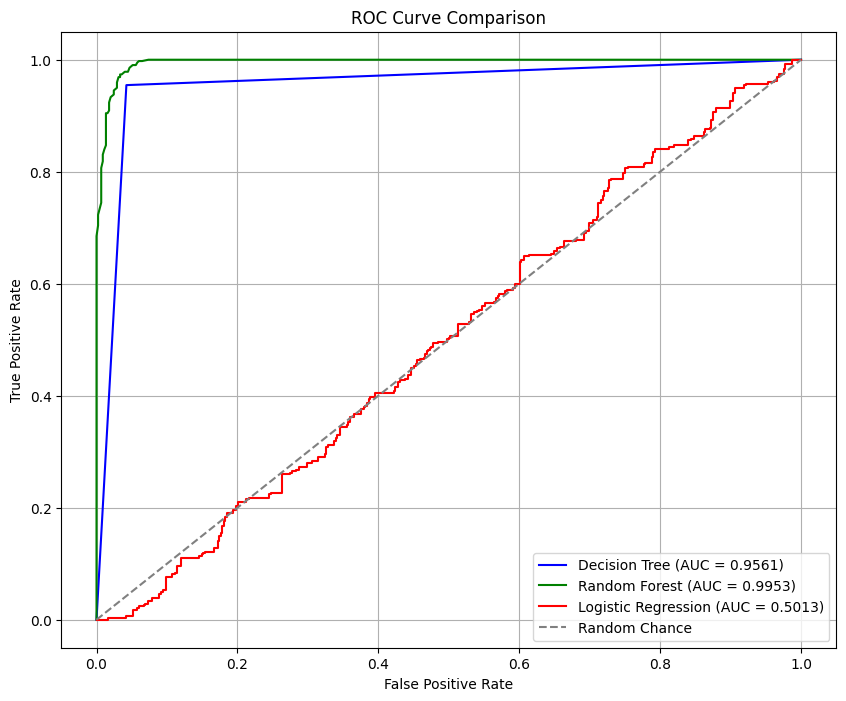

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve

# Generate predicted probabilities for all models implemented
y_probs_tree = DTmodel.predict_proba(X_test)[:, 1]  # Decision Tree
y_probs_rf = RFmodel.predict_proba(X_test)[:, 1]    # Random Forest
y_probs_lr = LRmodel.predict_proba(X_test)[:, 1]    # Logistic Regression

# Calculating the ROC AUC scores
roc_auc_tree = roc_auc_score(y_test, y_probs_tree)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)
roc_auc_lr = roc_auc_score(y_test, y_probs_lr)

print(f"Decision Tree - ROC AUC Score: {roc_auc_tree:.4f}")
print(f"Random Forest - ROC AUC Score: {roc_auc_rf:.4f}")
print(f"Logistic Regression - ROC AUC Score: {roc_auc_lr:.4f}")

#ROC curves
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)

# Plotting ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_tree, tpr_tree, color='blue', label=f"Decision Tree (AUC = {roc_auc_tree:.4f})")
plt.plot(fpr_rf, tpr_rf, color='green', label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot(fpr_lr, tpr_lr, color='red', label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Chance")  # Random chance line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The above is a ROC AUC curve for all our model implementations.

The steep increase in the ROC curve indicates that the model is performing well.

It is obvious that LR is worst performing from the ROC curve.

RF is the best performing model, slightly better than Decision Tree. We can say this since the ROC curve of RF is above DT, also the ROC AUC score(area under the curve) is higher for Random Forest.

As promised earlier, We will now try and tune the hyper parameters for our Random Forest and Decision Tree models

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Optimized Decision Tree Metrics:
Model Accuracy: 0.9539
Precision: 0.9566
Recall: 0.9475
F1 Score: 0.9520


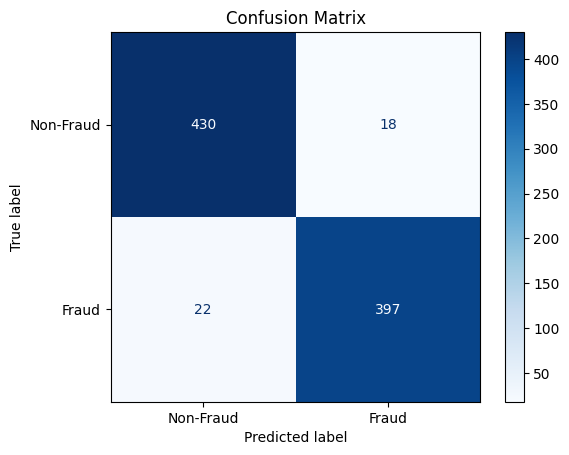

In [104]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_tree_model = grid_search.best_estimator_

y_pred_best = best_tree_model.predict(X_test)

# Evaluate the best DT model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

# Print the metrics
print("\nOptimized Decision Tree Metrics:")

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Optimized Model Accuracy: 0.9712
Optimized Precision: 0.9603
Optimized Recall: 0.9809
Optimized F1 Score: 0.9705


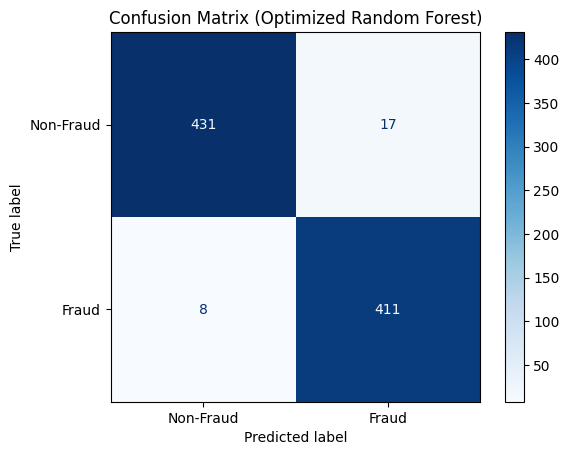

In [105]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples at a leaf
    'bootstrap': [True, False]             # Use bootstrap samples
}


rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    cv=3,       # Cross-validation splits
    scoring='f1',  # Optimize for F1 Score
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Perform the random search on the training set
rf_random_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf_model = rf_random_search.best_estimator_
best_params = rf_random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the optimized model
y_pred_optimized = best_rf_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

# Print the optimized metrics
print(f"Optimized Model Accuracy: {accuracy_optimized:.4f}")
print(f"Optimized Precision: {precision_optimized:.4f}")
print(f"Optimized Recall: {recall_optimized:.4f}")
print(f"Optimized F1 Score: {f1_optimized:.4f}")

# Display the confusion matrix for the optimized model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
plt.title('Confusion Matrix (Optimized Random Forest)')
plt.show()


Of all the models and after all the tuning of the hyper parameters, we can conclude that the best performing model on our dataset is Hyper Parameter tuned Random Forest with accuracy of 97% and F1 score of 0.97



# Conclusion

Using Machine Learning has proved to be very effective way of recognizing a fraud transaction. This will hugely help in minimizing the losses caused by fraud transactions. Now let us conclude by listing out the key findings during this Data Science pipeline implementation.

1. We have started out by selecting a key area where data science and machine learning can be implemented. I have selected credit card fraud detection for this purpose.
2. Then we have imported the unclean dataset that we have processed to get a clean dataset
3. Next, we have performed feature engineering to engineer meaningful features from existing feature columns. After that, we have dropped the columns which are not useful anymore for our analysis. We have also performed encoding namely one hot encoding and target encoding, to tranform the categorical features in our dataset.
4. The next step was to start our Exploratory Data Analysis. We have drawn inferences from various graphs between features and fraud transaction details.
5. After EDA, we have implemented 3 models on our data, namely, Random Forest, Decision Tree, and Logistic Regression. We have colcluded from our metric calculations that, Logistic Regression was worst performing model. While Decision tree was performing at a very high accuracy of 95%, Random Forest was the best performing model with 96% accuracy.
6. Then we tried to further enhance our model performances by using Randomized Search CV and Grid Search CV. While Decision tree accuracy did not improve much, Random Forest accuracy improved to 97%.


Further readings


I want to end this tutorial by pointing out to works that are in the similar fraud detection that I believe will help reader gain further knowledge in using machine learning in this field of fraud detection.

1. Machine Learning in Fraud Detection: Examples and Emerging Trends - by Serhii Kholan - https://onix-systems.com/blog/machine-learning-in-fraud-detection

2. Artificial Intelligence and Fraud Detection - https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3738618



I hope this tutorial has helped reader in gaining some insight into complete Data Science Pipeline and application of Machine learning in a real world problem.